# Введение в анализ данных
## Домашнее задание 1. `Numpy`, `matplotlib`, `scipy.stats`


**Правила:**

* Дедлайн **25 марта 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Пропущенные описания принимаемых аргументов дописать на русском.
* Если код будет не понятен проверяющему, оценка может быть снижена.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):
* Задача 1.1 -- 3 балла
* Задача 1.2 -- 3 балла
* Задача 2 -- 3 балла

Сложная часть (необходимо на "отл"):
* Задача 1.3 -- 3 балла
* Задача 3.1 -- 3 балла
* Задача 3.2 -- 3 балла
* Задача 3.3 -- 3 балла
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [2]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

### Легкая часть: генерация

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [3]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = sps.rv_discrete(name='coin_distribution', 
                                    values=([0, 1], [0.5, 0.5])).rvs

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [4]:
coin(size=10)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [5]:
def uniform(size=1, precision=30):
    return (coin(size=np.append(size, precision)) \
            * (2.0 ** (-1 - np.arange(precision)))).sum(axis=-1)


Для $U[0, 1]$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

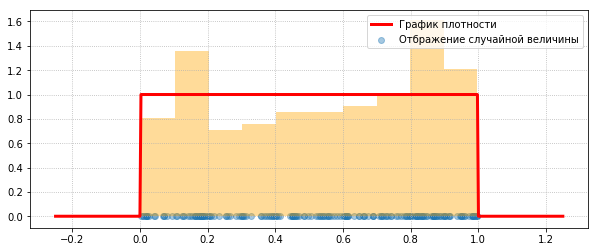

In [6]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size=size, precision=50)

# Отрисовка графика
plt.figure(figsize=(10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4,
    label='Отбражение случайной величины'
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins=10, 
    density=True, 
    alpha=0.4, 
    color='orange'
)

# рисуем график плотности
plt.plot(
    grid, 
    sps.uniform.pdf(grid), 
    color = 'red', 
    lw = 3, 
    label = 'График плотности'
)
plt.legend(fontsize=10, loc = 1)
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

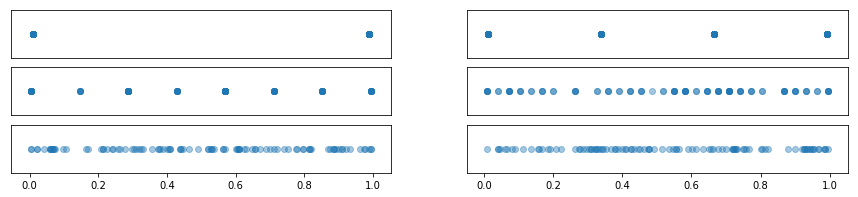

In [7]:
size = 100

plt.figure(figsize=(15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size=size, precision=precision), 
        np.zeros(size), 
        alpha = 0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

# Вывод: 
Такое распределение с помощью монетки неплохо приближает равномерное распеделение, однако чем меньше `precision`, тем хуже приближение. 

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ -- независимые случайные величины, равномерно распределенные на (0, 1]. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. Желательно использовать как можно меньше бросков монеты.

In [8]:
def normal(size=1, loc=0, scale=1, precision=30):
    first = uniform(size=np.prod(size)//2 + 1, precision=precision)
    second = uniform(size=np.prod(size)//2 + 1, precision=precision)
    
    X = np.cos(2*first*np.pi)*np.sqrt((-2)*np.log(second)) * scale + loc
    Y = np.sin(2*first*np.pi)*np.sqrt((-2)*np.log(second)) * scale + loc
    
    return np.append(X,Y)[:np.prod(size)].reshape(size)
    

Для $\mathcal{N}(0, 1)$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

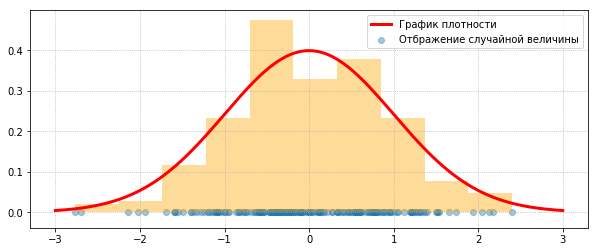

In [9]:
size = 200
sample = normal(size=size)
grid = np.linspace(-3,3,size)

# Отрисовка графика
plt.figure(figsize=(10,4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4,
    label='Отбражение случайной величины'
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins=10, 
    density=True, 
    alpha=0.4, 
    color='orange'
)

# рисуем график плотности
plt.plot(
    grid, 
    sps.norm(0,1).pdf(grid), 
    color = 'red', 
    lw = 3, 
    label = 'График плотности'
)
plt.legend(fontsize=10, loc = 1)
plt.grid(ls=':')
plt.show()



### Сложная часть: генерация

**Часть 3.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя из теории вероятностей:

*Если $\xi$ --- случайная величина, имеющая абсолютно непрерывное распределение, и $F$ --- ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить?

Пусть $\xi$ -- случайная величина, имеющая равномерное распеределение на $[a, b]$, тогда получим экспоненциальную случайную величину, если применим $F^{-1}(\xi)$, где $F$ -- функция экспоненциального распределения.



Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [10]:
def expon(size=1, lambd=1, precision=30):
    return -np.log(1 - uniform(size=size, precision=precision)) / lambd

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

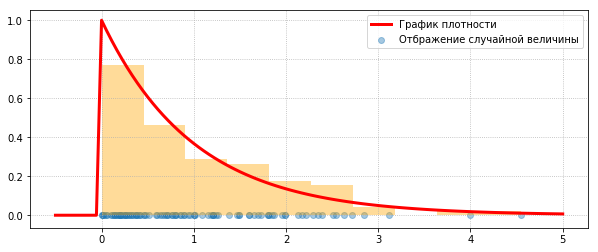

In [11]:
size = 100
sample = expon(size=size, lambd=1)

grid = np.linspace(-0.5,5,size)

# Отрисовка графика
plt.figure(figsize=(10,4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4,
    label='Отбражение случайной величины'
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins=10, 
    density=True, 
    alpha=0.4, 
    color='orange'
)

# рисуем график плотности
plt.plot(
    grid, 
    sps.expon().pdf(grid), 
    color = 'red', 
    lw = 3, 
    label = 'График плотности'
)
plt.legend(fontsize=10, loc = 1)
plt.grid(ls=':')
plt.show()

**Вывод по задаче:**

# Вывод: 
Из любой случайной величины, распределенной абсолютно непрерывно, с помощью необходимой функции распределения можно получить другую случайную величину, распределенная по нужному закону. В нашем случае из равномерной с.в. получили с.в., с экспоненциальным распределением.

### Легкая часть: матричное умножение

### Задача 2
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение (`numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`). Разрешено пользоваться только простыми векторно-арифметическими операциями над `numpy.array`, а также преобразованиями осей. *Авторское решение занимает одну строчку.*

In [12]:
def matrix_multiplication(A, B):
    C = np.zeros((len(A), len(B[0])))
    for i in range (len(A)):
        for j in range (len(B[0])):
            C[i][j] = (A[i] * B[:, j]).sum()
    return C

Проверьте правильность реализации на случайных матрицах. Должен получится ноль.

In [13]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

1.2745360322696797e-13

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [14]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код должен работать почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [15]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B) 

CPU times: user 705 ms, sys: 4.87 ms, total: 710 ms
Wall time: 716 ms
CPU times: user 3.8 ms, sys: 1.41 ms, total: 5.22 ms
Wall time: 2.77 ms
CPU times: user 5.93 ms, sys: 640 µs, total: 6.57 ms
Wall time: 1.82 ms
CPU times: user 17 s, sys: 116 ms, total: 17.1 s
Wall time: 16.8 s
CPU times: user 9.47 ms, sys: 361 µs, total: 9.83 ms
Wall time: 9.45 ms


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [16]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    
    return C

### Сложная часть: броуновское движение

### Задача 3

**Познавательная часть задачи** (не пригодится для решения задачи)

Абсолютное значение скорости движения частиц идеального газа, находящегося в состоянии ТД-равновесия, есть случайная величина, имеющая распределение Максвелла и зависящая только от одного термодинамического параметра &mdash; температуры $T$.

В общем случае плотность вероятности распределения Максвелла для n-мерного пространства имеет вид:

$p(v) = \text{C}~\large e^{- \frac{mv^2}{2kT}} \normalsize v^{n-1}$,

где $v\in[0,+\infty)$, а константа $\text{C}$ находится из условия нормировки $\large\int\limits_0^{+\infty}\normalsize p(v)\mathrm dv=1$.

Физический смысл этой функции таков: вероятность того, что скорость частицы входит в промежуток $[v_0,v_0+\mathrm dv]$, приближённо равна $p(v_0)\mathrm dv$ при достаточно малом $\mathrm dv$. Тут надо оговориться, что математически корректное утверждение таково:

$\lim\limits_{\mathrm dv\to0}\large\frac{\mathsf{P} \{v \:|\: v\:\in\:[v_0, v_0+\mathrm dv]\}}{\mathrm dv}\normalsize=p(v_0)$.

Поскольку это распределение не ограничено справа, определённая доля частиц среды приобратает настолько высокие скорости, что при столкновении с макрообъектом может происходить заметное отклонение как траектории, так и скорости его движения.

Мы предполагаем идеальность газа, поэтому компоненты вектора скорости частиц среды $v_i$ можно считать независимыми нормально распределёнными случайными величинами, т.е.

$v_i\sim\mathcal{N}(0,s^2)$,

где $s$ зависит от температуры и массы частиц и одинаково для всех направлений движения.

При столкновении макрообъекта с частицами среды происходит перераспределение импульса в соответствии с законами сохранения энергии и импульса, но в силу большого числа подобных событий за единицу времени, моделировать их напрямую достаточно затруднительно. Поэтому для выполнения этого ноутбука сделаем следующие предположения:

- Приращение компоненты координаты броуновской частицы за фиксированный промежуток времени (или за шаг) $\Delta t$ имеет вид $\Delta x_i\sim\mathcal{N}(0,\sigma ^ 2)$.
- $\sigma$ является конкретным числом, зависящим как от $\Delta t$, так и от параметров броуновской частицы и среды.
- При этом $\sigma$ не зависит ни от координат, ни от текущего вектора скорости броуновкой частицы.

Если говорить формальным языком, в этом ноутбуке мы будем моделировать [Винеровский случайный процесс](https://ru.wikipedia.org/wiki/Винеровский_процесс) с фиксированным шагом.

**Задание**

#### 1. Разработать функцию симуляции броуновского движения

Функция должна вычислять приращение координаты частицы на каждом шаге как $\Delta x_{ijk}\sim\mathcal{N}(0,\sigma^2)~\forall i,j,k$, где $i$ &mdash; номер частицы, $j$ &mdash; номер координаты, а $k$ &mdash; номер шага. Функция принимает в качестве аргументов:
- Параметр $\sigma$;
- Количество последовательных изменений координат (шагов), приходящихся на один процесс;
- Число процессов для генерации (количество различных частиц);
- Количество пространственных измерений для генерации процесса.

Возвращаемое значение:
- 3-х мерный массив `result`, где `result[i,j,k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

##### Общее требование

- Считать, что все частицы в начальный момент времени находятся в начале координат.

##### Что нужно сделать
- Реализовать функцию для произвольной размерности, не используя циклы.
- Дописать проверки типов для остальных аргументов.

Обратите внимание на использование аннотаций для типов аргументов и возвращаемого значения функции. В новых версиях Питона подобные возможности синтаксиса используются в качестве подсказок для программистов и статических анализаторов кода, и никакой дополнительной функциональности не добавляют.

Например, `typing.Union[int, float]` означает `"или int, или float"`.

##### Что может оказаться полезным
- Генерация нормальной выборки: `scipy.stats.norm`. [Ссылка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
- Кумулятивная сумма: метод `cumsum` у `np.ndarray`. [Ссылка](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.cumsum.html)

In [17]:
def generate_brownian(sigma: typing.Union[int, float] = 1,
                      *,
                      n_proc: int = 10,
                      n_dims: int = 2,
                      n_steps: int = 100) -> np.ndarray:
    """
    :param sigma:    стандартное отклонение нормального распределения,
                     генерирующего пошаговые смещения координат
    :param n_proc:   <ДОПИСАТЬ>
    :param n_dims:   <ДОПИСАТЬ>
    :param n_steps:  <ДОПИСАТЬ>

    :return:         np.ndarray размера (n_proc, n_dims, n_steps), содержащий
                     на позиции [i,j,k] значение j-й координаты i-й частицы 
                     на k-м шаге.
    """
    if not np.issubdtype(type(sigma), np.number):
        raise TypeError("Параметр 'sigma' должен быть числом")
        
    if not np.issubdtype(type(n_proc), np.integer):
        raise TypeError("Параметр 'n_proc' должен быть целочисленным аргументом")
        
    if not np.issubdtype(type(n_dims), np.integer):
        raise TypeError("Параметр 'n_dims' должен быть целочисленным аргументом")
        
    if not np.issubdtype(type(n_steps), np.integer):
        raise TypeError("Параметр 'n_steps' должен быть целочисленным аргументом")
    
    # <ДОПИСАТЬ ПРОВЕРКИ ТИПОВ>
    return sps.norm(loc=0, scale=sigma).rvs((n_proc, n_dims, n_steps)).cumsum(axis=2)


Символ `*` в заголовке означает, что все аргументы, объявленные после него, необходимо определять только по имени.

Например,

```python
generate_brownian(323, 3)          # Ошибка
generate_brownian(323, n_steps=3)  # OK
```

При проверке типов остальных аргументов, по аналогии с `np.number`, можно использовать `np.integer`. Конструкция `np.issubdtype(type(param), np.number)` используется по причине того, что стандартная питоновская проверка `isinstance(sigma, (int, float))` не будет работать для `numpy`-чисел `int64, int32, float64` и т.д.

In [18]:
brownian_2d = generate_brownian(2, n_steps=12000, n_proc=500, n_dims=2)
assert brownian_2d.shape == (500, 2, 12000)

#### 2. Визуализируйте траектории для 9-ти первых броуновских частиц

##### Что нужно сделать
- Нарисовать 2D-графики для `brownian_2d`. 
- Нарисовать 3D-графики для `brownian_3d = generate_brownian(2, n_steps=12000, n_proc=500, n_dims=3)`. 

##### Общие требования
- Установить соотношение масштабов осей, равное 1, для каждого из подграфиков.

##### Что может оказаться полезным
- [Туториал](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html) по построению нескольких графиков на одной странице.
- Метод `plot` у `AxesSubplot` (переменная `ax` в цикле ниже).
- Метод `set_aspect` у `AxesSubplot`.

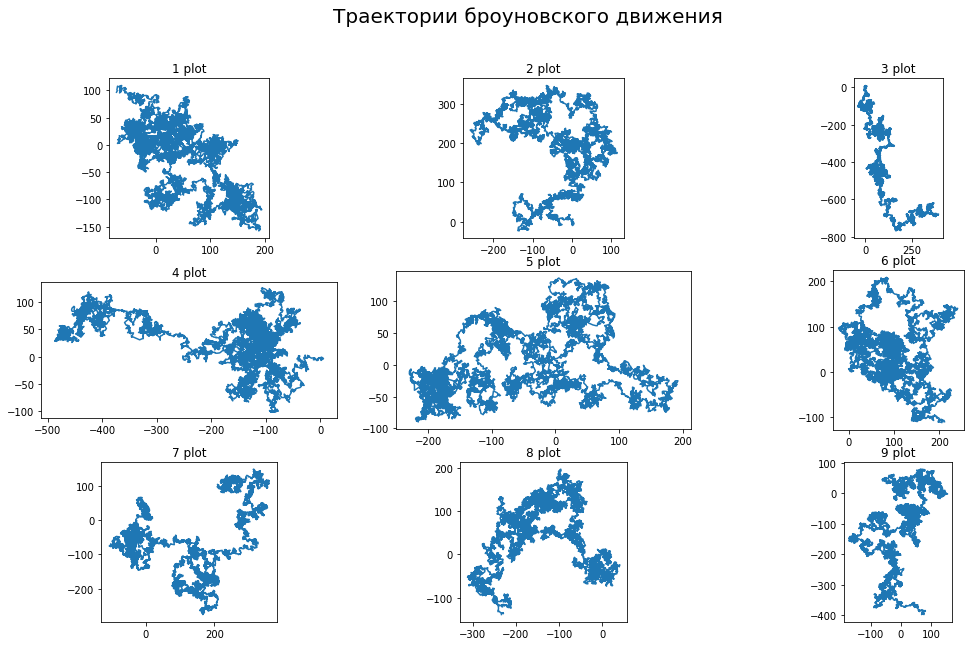

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Траектории броуновского движения', fontsize=20)
number = 1
for ax, (xs, ys) in zip(axes.flat, brownian_2d):
    ax.plot(xs, ys)
    ax.set_aspect('equal')
    ax.set_title(f'{number} plot')
    number +=1
    pass

#### 3. Постройте график среднего расстояния частицы от начала координат в зависимости от времени (шага)

- Постройте для `n_dims` от 1 до 5 включительно.
- Кривые должны быть отрисованы на одном графике. Каждая кривая должна иметь легенду.
- Для графиков подписи к осям обязательны.

#####  Вопросы
- Как вы думаете, какой функцией может описываться данная зависимость?
- Сильно ли её вид зависит от размерности пространства?
- Можно ли её линеаризовать? Если да, нарисуйте график с такими же требованиями.

In [20]:
brownian_3d = generate_brownian(2, n_steps=12000, n_proc=500, n_dims=3)

In [21]:
plt.figure(figsize=(12, 6))

for n_dims in range(1, 6):
    plt.plot(
        ,
        label=f'Размерность: {n_dims}'
    )

plt.ylabel('Ср. раст. частицы от нач. координат')
plt.xlabel('Шаг')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-f041b248b5f3>, line 5)

### Сложная часть: визуализация распределений

### Задача 4

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1) На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2) Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3) Сделать выводы о свойтсвах каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. 

In [24]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

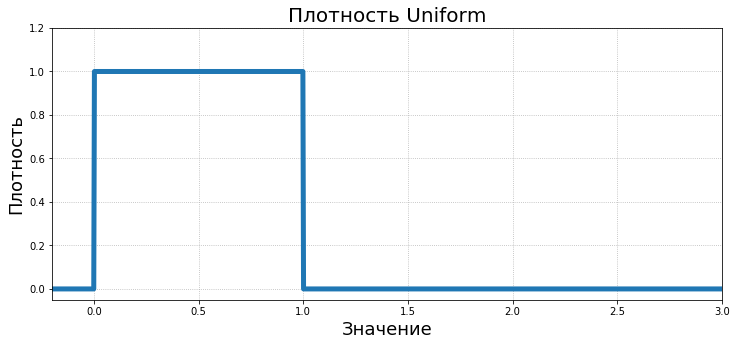

In [34]:
show_pdf(pdf=sps.uniform.pdf, xmin=-0.2, xmax=3, ymax=1.2, 
         grid_size=1000, distr_name=r'Uniform', 
         scale=1)

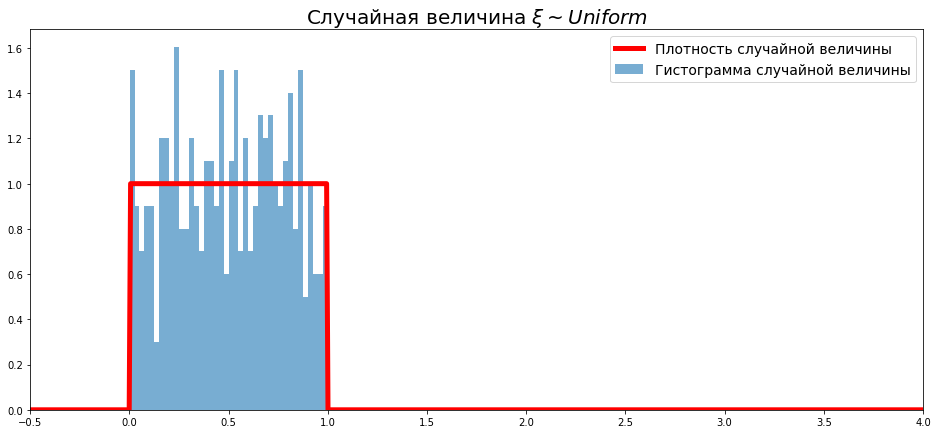

In [77]:
grid = np.linspace(-3, 4, 1000)
plt.figure(figsize=(16, 7))
sample = sps.uniform.rvs(size=400)
plt.hist(sample,  bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.uniform.pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Uniform$', fontsize=20)
plt.xlim(-0.5, 4)
plt.legend(fontsize=14, loc=1)
plt.show()

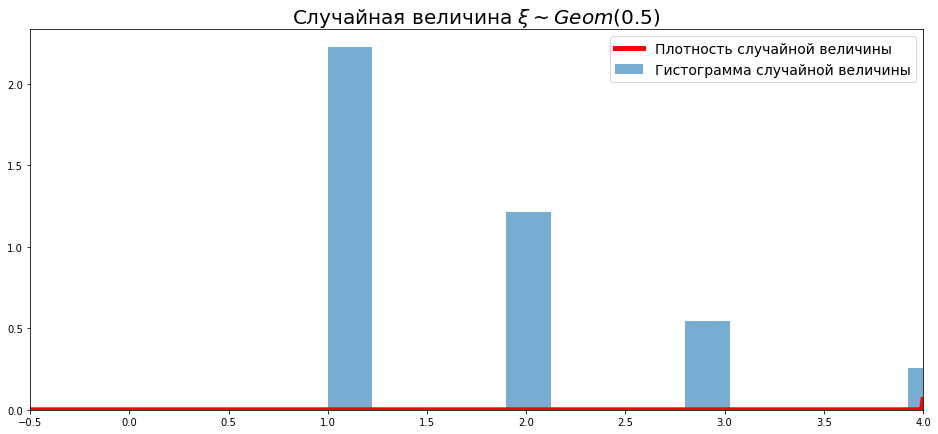

In [79]:
grid = np.linspace(-3, 4, 1000)
plt.figure(figsize=(16, 7))
sample = sps.geom(0.5).rvs(size=400)
plt.hist(sample,  bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.geom(0.5).pmf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Geom(0.5)$', fontsize=20)
plt.xlim(-0.5, 4)
plt.legend(fontsize=14, loc=1)
plt.show()

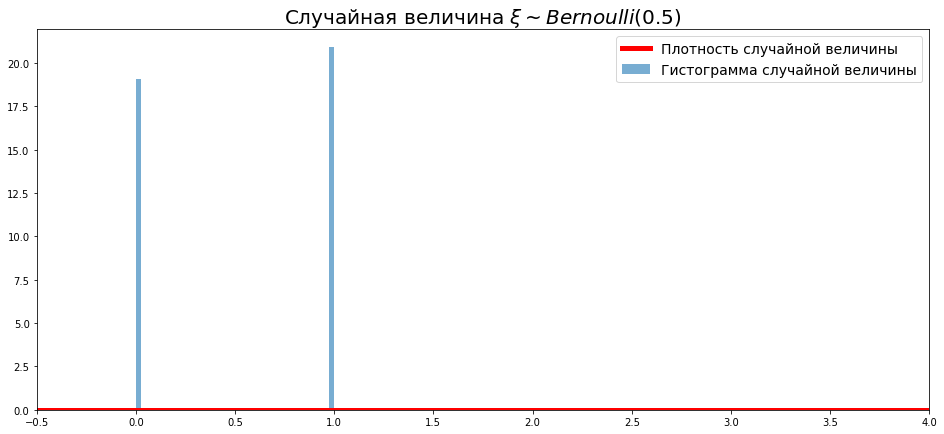

In [87]:
grid = np.linspace(-3, 4, 1000)
plt.figure(figsize=(16, 7))
sample = sps.bernoulli(0.5).rvs(size=400)
plt.hist(sample,  bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.bernoulli(0.5).pmf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Bernoulli(0.5)$', fontsize=20)
plt.xlim(-0.5, 4)
plt.legend(fontsize=14, loc=1)
plt.show()

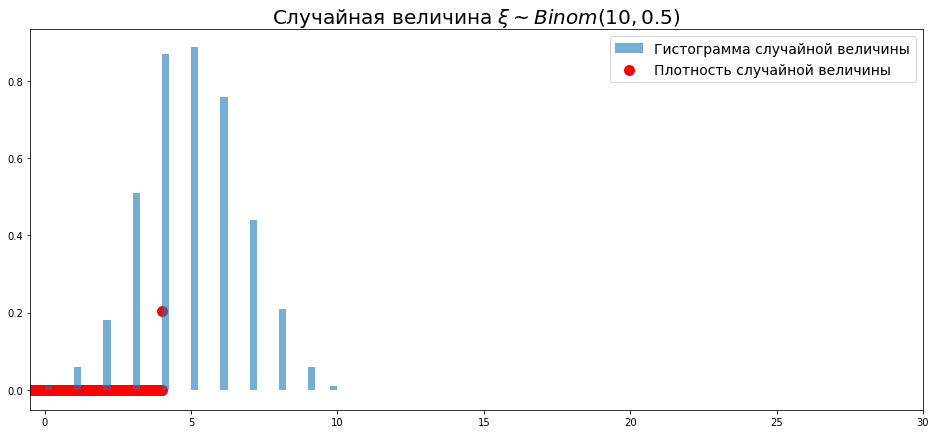

In [98]:
grid = np.linspace(-3, 4, 1000)
plt.figure(figsize=(16, 7))
sample = sps.binom(10,0.5).rvs(size=400)
plt.hist(sample,  bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.scatter(grid, sps.binom(10, 0.5).pmf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Binom(10, 0.5)$', fontsize=20)
plt.xlim(-0.5, 30)
plt.legend(fontsize=14, loc=1)
plt.show()